# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40 #ranges from -40 to +40
)

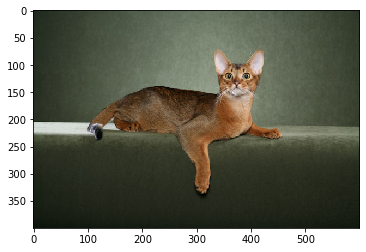

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


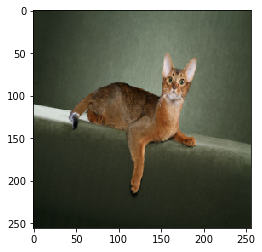

In [11]:
#iterates over all the images in the "images" directory
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Width and Height Shifts

In [21]:
#range is a list
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [60, -90, 5, 120],
    height_shift_range = [100, -50, 5]
)

Found 1 images belonging to 1 classes.


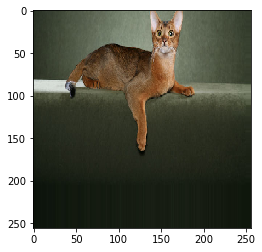

In [31]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Brightness

Found 1 images belonging to 1 classes.


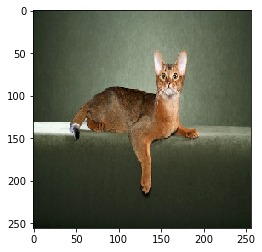

In [46]:
#range is a tuple but list can be used
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (-0.5, 1.5)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Shear Transformation

Found 1 images belonging to 1 classes.


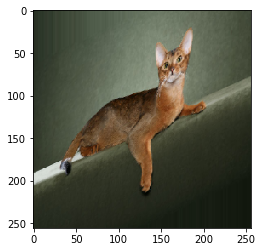

In [53]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40 #value in degrees
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Zoom

Found 1 images belonging to 1 classes.


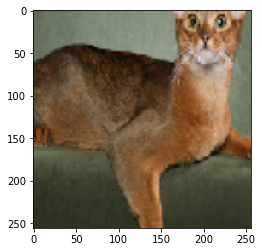

In [71]:
# range can be a single value or list or tuple with 2 elements
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #zoom_range = 0.5
    #zoom_range = [-0.1 , 1]
    zoom_range = (0.4 , 0.5)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Channel Shift

Found 1 images belonging to 1 classes.


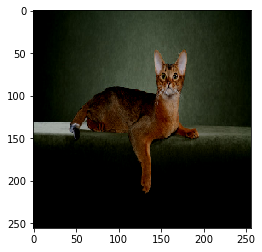

In [80]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 65 #ranges from -65 to +65
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Flips

Found 1 images belonging to 1 classes.


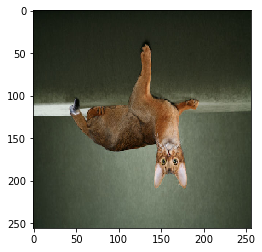

In [90]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True #setting both to True results on random choice for example both true or any one true and the other false
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Normalization

### Featurewise

In [91]:
# using cifar10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#to normalize without using the in-built function
#x_mean = x_train.mean()
#x_std = x_train.std()
#x_train_norm = (x_train - x_mean)/x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [97]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.33453166 0.81301755 [[4]]
120.70756512369792


### Samplewise

In [107]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

8.443991e-08 0.99999994 [[1]]


# Rescale and Preprocessing Function

In [111]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 10,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input #it can be any function but only input a 3D array, here we are inputting a preprocessed inout which will be applied to our example set
)

In [118]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [119]:
print(x.mean(), x.std(), y)

0.8380823 4.0443254 [[6]]


# Using in Model Training

In [120]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, #it can be any function but only input a 3D array, here we are inputting a preprocessed inout which will be applied to our example set
    horizontal_flip = True,
    rotation_range = 40
)

In [123]:
#using MobilNetV2 CNN
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32, 32, 3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
# sparse_categorical_crossentropy because we are not encoding name and instead using numeric values 0-9 for cifar-10
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [125]:
#increasing the number of epochs and steps_per_epoch will increase the accuracy 
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs = 1, steps_per_epoch = 10
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 11s 1s/step - loss: 3.3309 - accuracy: 0.1531
